<a href="https://colab.research.google.com/github/ahmedebeed555/deeplearning/blob/main/24Aug2025NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Preprocess data
X_train = X_train / 255.0  # scale pixel values (0–255 → 0–1)
X_test = X_test / 255.0

# One-hot encode labels (e.g., 7 → [0,0,0,0,0,0,0,1,0,0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Build model
model = Sequential([
    Flatten(input_shape=(28,28)),       # Flatten 28x28 image → 784 features
    Dense(128, activation='relu'),      # Hidden layer with 128 neurons
    Dense(64, activation='relu'),       # Hidden layer with 64 neurons
    Dense(10, activation='softmax')     # Output layer (10 classes: digits 0–9)
])

# 4. Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# 6. Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8620 - loss: 0.4731 - val_accuracy: 0.9603 - val_loss: 0.1343
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9646 - loss: 0.1140 - val_accuracy: 0.9699 - val_loss: 0.1025
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9777 - loss: 0.0738 - val_accuracy: 0.9706 - val_loss: 0.1014
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9828 - loss: 0.0551 - val_accuracy: 0.9757 - val_loss: 0.0858
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9864 - loss: 0.0419 - val_accuracy: 0.9711 - val_loss: 0.1089
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9651 - loss: 0.1151
Test accuracy: 0.9700999855995178


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


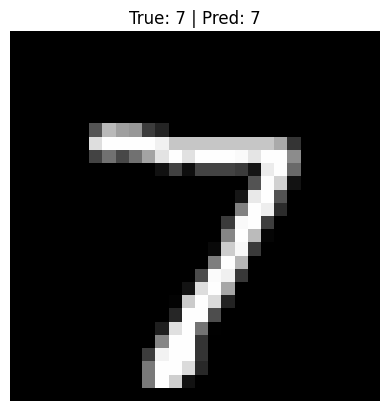

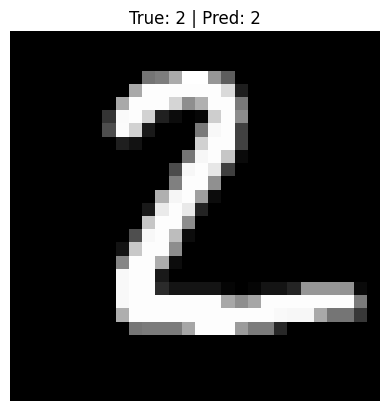

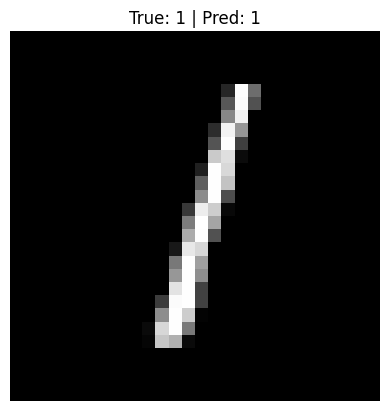

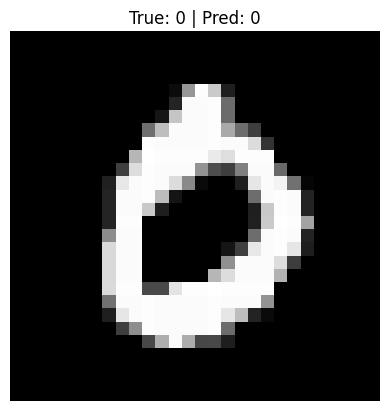

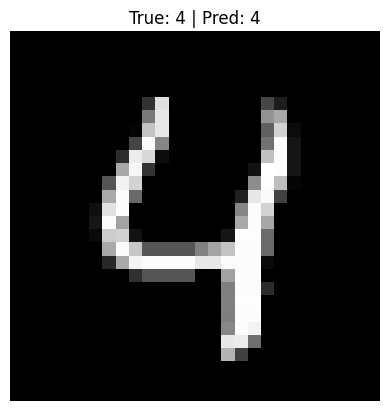

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Make predictions on test data
predictions = model.predict(X_test)

# 2. Function to plot image and prediction
def plot_image(index):
    plt.imshow(X_test[index], cmap="gray")
    plt.title(f"True: {np.argmax(y_test[index])} | Pred: {np.argmax(predictions[index])}")
    plt.axis("off")
    plt.show()

# 3. Show first 5 test images with predictions
for i in range(5):
    plot_image(i)
